# $\heartsuit$ main $\heartsuit$

In [36]:
import os
from os import listdir
from os.path import join
from PIL import Image

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.io import read_image

from functions import *

## set device

In [37]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
    
print(device)

mps


We set up device in order to determine which device are we using. 

In [38]:
scale_factor    = 4
batch_size      = 32
epoch           = 1
learning_rate   = 0.0003
criterion       = nn.MSELoss()

We set our hyper-parameters here. We have a scale factor = 4 which means we are transforming 128 x 128 picture to 512 x 512 picture. 

In [57]:
train_data = DatasetFromFolder("../data/train/wild", scale_factor=scale_factor)
test_data = DatasetFromFolder("../data/train/wild", scale_factor=scale_factor)
ref_data = DatasetFromFolder("../data/loss", scale_factor=scale_factor)

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
ref_dataloader = DataLoader(ref_data, batch_size=1, shuffle=False)

We define our data loader here. 

In [58]:
model = Model(scale_factor=scale_factor).to(device)

This is our CNN model

TypeError: train() missing 1 required positional argument: 'train_dataloader'

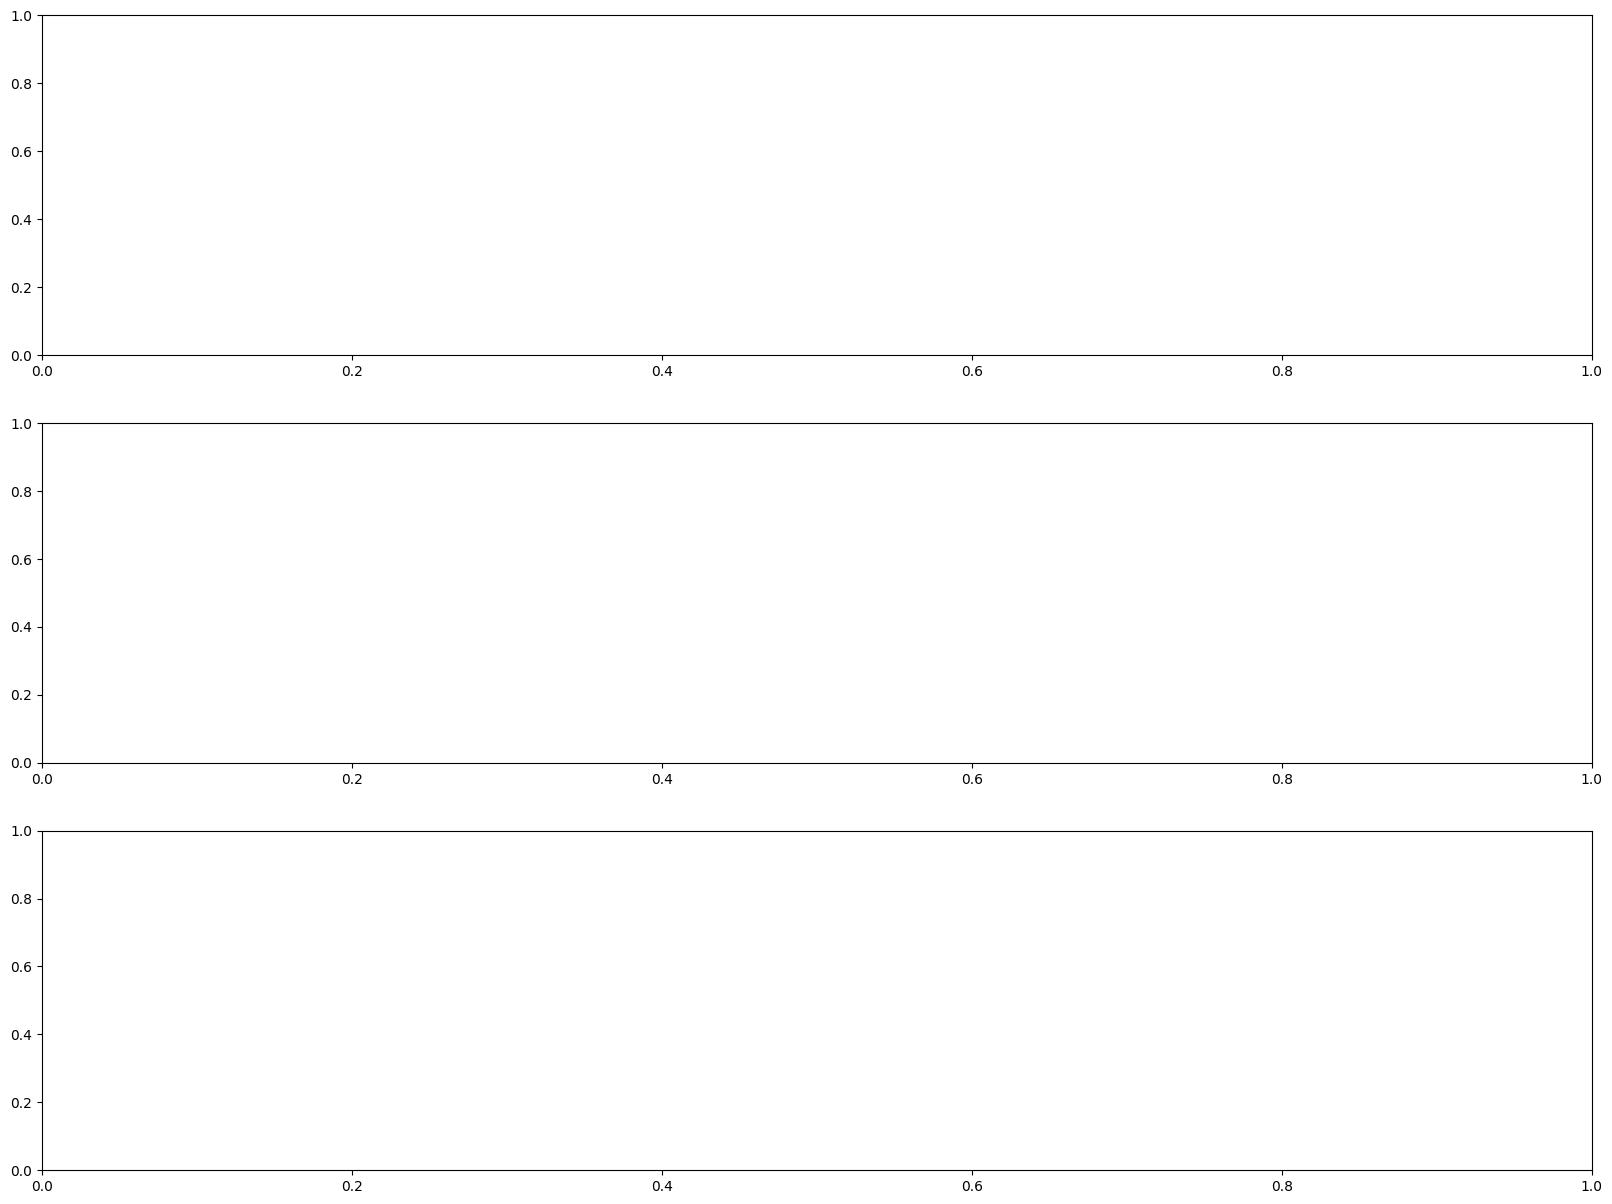

In [59]:
figure, ax = plt.subplots(3, epoch)
figure.set_size_inches(20, 15)

loss_history = []
test_loss_history = []

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for i in range(epoch):
    epoch_loss_history, epoch_test_loss_history = train(i, model)
    loss_history = loss_history + epoch_loss_history
    test_loss_history = test_loss_history + epoch_test_loss_history
    del(epoch_loss_history)
    del(epoch_test_loss_history)
    
    ref = next(iter(ref_dataloader))[0]
    ref_tgt = next(iter(ref_dataloader))[1]
    ref_fit = model(ref.to(device)).cpu()
    
    ref = swap(ref.squeeze())
    ref_tgt = swap(ref_tgt.squeeze())
    ref_fit = swap(ref_fit.detach().numpy().squeeze())

    ax[0, i].imshow(ref)
    ax[1, i].imshow(ref_fit)
    ax[2, i].imshow(ref_tgt)

figure.show()

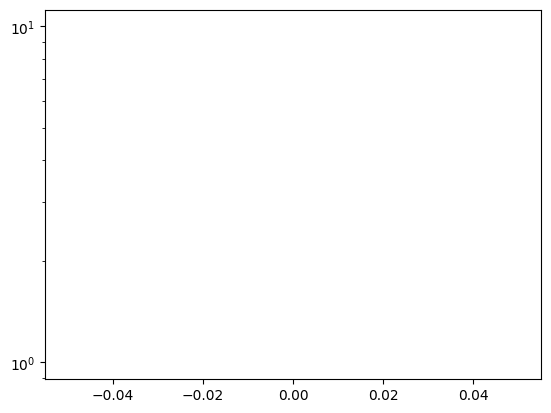

In [42]:
plt.yscale("log")
plt.plot(loss_history)
plt.plot(test_loss_history)
plt.show()